# SNN clustering with GA optimization of Dunn index

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import figure
import seaborn as sb
from sklearn import datasets

In [2]:
sb.set()

In [3]:
%load_ext autoreload
import sys
sys.path.append("/home/gmancini/Dropbox/appunti/old_search_algos_28_08_2020/EvolutionaryAlgorithms/src")
sys.path.append("/home/gmancini/Dropbox/appunti/old_search_algos_28_08_2020/molecule_utils")
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/src")
sys.path.append("/home/gmancini/Dropbox/appunti/Clustering/test")
sys.path.append("/home/gmancini/Dropbox/fit_test")
import ga_evolution, ga_population
import myclusters, myvalidation, mdutils, opt_noise_ga
%autoreload 2

# test data set

In [4]:
ch=np.loadtxt("ch.dat")
ch.shape

(8000, 2)

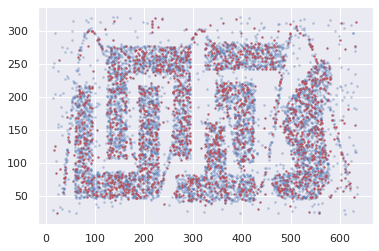

In [5]:
plt.scatter(ch[:,0],ch[:,1],c='b',alpha=0.25,s=3)
plt.scatter(ch[::4,0],ch[::4,1],c='r',alpha=0.75,s=1.5)

In [6]:
X = ch[::4]

# Define model

### define domains for $k$, $minPTS$, $\epsilon$

In [7]:
maxK = 0.02*X.shape[0]

create an instance of the mutation class

In [8]:
mfunc = opt_noise_ga.paramgenerator(maxK=maxK)

create an instance of the crossover class

In [9]:
cofunc = opt_noise_ga.paraminterpolator()

## Create population

In [10]:
# population size 
nind = 100

In [11]:
pool = list()
for i in range(nind):
    param = opt_noise_ga.gen_model(maxK)
    pool.append(param)
pop = ga_population.GA_population(chromosomes=np.asarray(pool), coding_only=True)

## Run EA

In [12]:
nstep=18

In [13]:
fkwds = dict()
fkwds['eval_method'] = "Dunn"
#fkwds['data'] = DATA[1][0]
fkwds['data'] = X
fkwds['interd'] = 'nearest'
fkwds['intrad'] = 'allmax'
fkwds['precomputed'] = False
fkwds['scaleN'] = 0.25
fkwds['penalty'] = False

In [14]:
fkwds['data'].shape

(2000, 2)

In [15]:
myGA = ga_evolution.GenAlg(last_rank=True, sel_press=0.5, pCo=0.5, ppmut=0.3, pcmut=0.5,\
           verbose=4, co_meth="custom", cofunc=cofunc, tsize=2, mfunc=mfunc, mut="custom")

+++ Parent selection method:  tournament
+++ CrossOver method:  custom
+++ Mutation  method:  custom


In [16]:
fitness, chrm, specm = myGA.Evolve(genotype=None, pop=pop, niter=nstep, ffunc=opt_noise_ga.param_evaluator,\
                                fitkwds=fkwds, optimal=0.)

+++ Starting selection: 50 specimens replaced at each generation
+++ Generation 0 done
+++ Generation 1 done
+++ Generation 2 done
+++ Generation 3 done
+++ Generation 4 done
+++ Generation 5 done
+++ Generation 6 done
+++ Generation 7 done
+++ Generation 8 done
+++ Generation 9 done
+++ Generation 10 done
+++ Generation 11 done
+++ Generation 12 done
+++ Generation 13 done
+++ Generation 14 done
+++ Generation 15 done
+++ Generation 16 done
+++ Generation 17 done
+++ Maximum number of generations reached


In [17]:
fitness, chrm

([16.844301661023678,
  16.844301661023678,
  16.844301661023678,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  24.960212579308003,
  27.61520423270866],
 [array([38, 29, 29]),
  array([2, 1, 1]),
  array([37,  5, 17]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([9, 3, 3]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([32,  9,  5]),
  array([15,  2,  2]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([12,  2,  4]),
  array([26,  9,  3]),
  array([12,  3,  5])])

In [33]:
my_estimator = myclusters.SNN(K=12, minPTS=3, epsilon=5, metric='euclidean')
ncluster, nnoise, clusters = my_estimator.do_clustering(X=X)

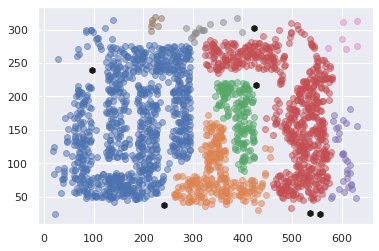

In [34]:
for i in set(clusters):
    plt.scatter(X[clusters==i,0],X[clusters==i,1],cmap=plt.cm.get_cmap('RdBu'),alpha=0.5)
plt.scatter(X[clusters==-1,0],X[clusters==-1,1],marker='h',c='k')

In [35]:
len(X[clusters==-1])

6

In [39]:
set(clusters)

{-1, 0, 1, 2, 3}